### Study

In [61]:
import pandas as pd
df0 = pd.read_csv('/Users/difa/Desktop/round-2-island-data-bottle/prices_round_2_day_-1.csv', sep=';')
df1 = pd.read_csv('/Users/difa/Desktop/round-2-island-data-bottle/prices_round_2_day_0.csv', sep=';')
df2 = pd.read_csv('/Users/difa/Desktop/round-2-island-data-bottle/prices_round_2_day_1.csv', sep=';')
df = pd.concat([df0, df1, df2], ignore_index=True)

In [62]:
df['product'].unique()

array(['CROISSANTS', 'JAMS', 'SQUID_INK', 'PICNIC_BASKET1',
       'PICNIC_BASKET2', 'RAINFOREST_RESIN', 'DJEMBES', 'KELP'],
      dtype=object)

In [55]:
import pandas as pd
import numpy as np
from itertools import combinations
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm

# Assuming df is your full dataset
df = df.iloc[:30000,:]
df['mid_price'] = (df['bid_price_1'] + df['ask_price_1']) / 2

pair_stats = []

products = df['product'].unique()

# Rank all pairs
for prod_a, prod_b in tqdm(combinations(products, 2)):
    price_a = df[df['product'] == prod_a]['mid_price'].values
    price_b = df[df['product'] == prod_b]['mid_price'].values
    
    if len(price_a) == len(price_b):
        spread = price_a - price_b
        adf_result = adfuller(spread)
        
        corr = np.corrcoef(price_a, price_b)[0, 1]
        spread_std = np.std(spread)
        
        pair_stats.append([prod_a, prod_b, corr, spread_std, adf_result[0], adf_result[1]])

pair_stats_df = pd.DataFrame(pair_stats, columns=['Product_A', 'Product_B', 'Correlation', 'Spread_Std', 'ADF_Stat', 'ADF_pValue'])
pair_stats_df['Score'] = pair_stats_df['Correlation'] / pair_stats_df['Spread_Std'] * -pair_stats_df['ADF_Stat']


28it [00:12,  2.27it/s]


In [56]:
pair_stats_df

,Product_A,Product_B,Correlation,Spread_Std,ADF_Stat,ADF_pValue,Score
0,CROISSANTS,JAMS,0.902391,6.243713,-2.840149,0.052764,0.410481
1,CROISSANTS,SQUID_INK,-0.730927,25.160235,-0.898895,0.788336,-0.026114
2,CROISSANTS,PICNIC_BASKET1,0.986208,159.486744,-0.223244,0.935694,0.001380
3,CROISSANTS,PICNIC_BASKET2,0.984710,49.632657,-1.080934,0.722615,0.021446
4,CROISSANTS,RAINFOREST_RESIN,0.009736,12.597245,-0.608730,0.868997,0.000470
5,CROISSANTS,DJEMBES,0.894067,7.377611,-2.493858,0.116976,0.302222
6,CROISSANTS,KELP,-0.736883,15.340131,-0.156933,0.943464,-0.007538
7,JAMS,SQUID_INK,-0.711454,21.067110,-0.986561,0.758134,-0.033317
8,JAMS,PICNIC_BASKET1,0.927933,164.325568,-0.267198,0.930023,0.001509
9,JAMS,PICNIC_BASKET2,0.920911,54.537549,-1.070988,0.726502,0.018084


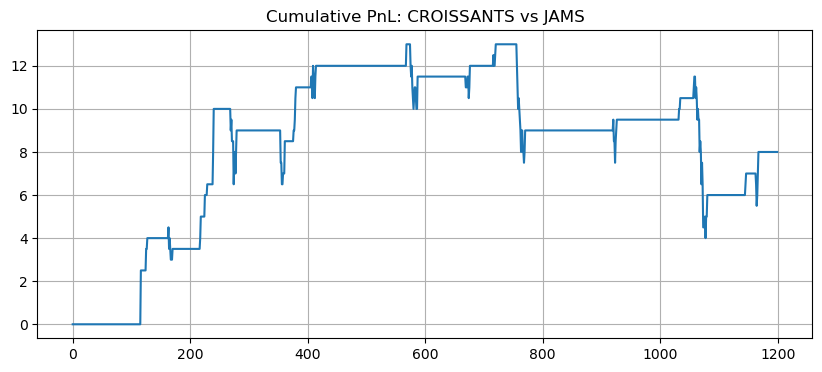

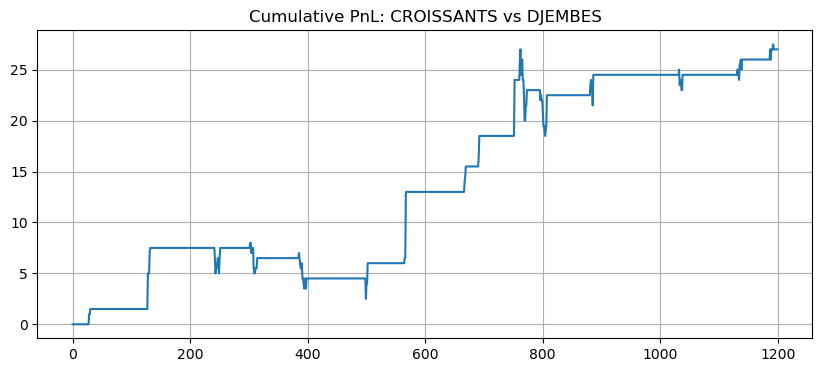

In [60]:
# Trading Logic for Stat Arb between top 3 pairs

# Select top 3 pairs
top_pairs = pair_stats_df.sort_values('Score', ascending=False).head(2)

trade_logs = []

# Parameters
entry_threshold = 2.5  # enter trade if spread > 2 std from mean
exit_threshold = 1.5  # exit when spread < 0.5 std from mean
position_size = 1  # fixed trade size

for idx, row in top_pairs.iterrows():
    prod_a, prod_b = row['Product_A'], row['Product_B']
    
    df_a = df[df['product'] == prod_a].set_index('timestamp')['mid_price']
    df_b = df[df['product'] == prod_b].set_index('timestamp')['mid_price']
    
    common_idx = df_a.index.intersection(df_b.index)
    price_a = df_a.loc[common_idx]
    price_b = df_b.loc[common_idx]
    
    spread = price_a - price_b
    mean_spread = spread.rolling(50).mean()
    std_spread = spread.rolling(50).std()
    
    position = 0  # +1 = long spread, -1 = short spread
    pnl = 0
    cum_pnl = []
    
    for t in range(50, len(spread)):
        s = spread.iloc[t]
        m = mean_spread.iloc[t]
        sd = std_spread.iloc[t]
        
        if position == 0:
            if s > m + entry_threshold * sd:
                position = -1  # short spread
            elif s < m - entry_threshold * sd:
                position = 1   # long spread
                
        elif position == 1 and s > m - exit_threshold * sd:
            pnl += (spread.iloc[t] - spread.iloc[t-1]) * position_size
            position = 0
        elif position == -1 and s < m + exit_threshold * sd:
            pnl += (spread.iloc[t-1] - spread.iloc[t]) * position_size
            position = 0
        else:
            pnl += (spread.iloc[t] - spread.iloc[t-1]) * position * position_size
        
        cum_pnl.append(pnl)
    
    plt.figure(figsize=(10, 4))
    plt.plot(cum_pnl)
    plt.title(f"Cumulative PnL: {prod_a} vs {prod_b}")
    plt.grid(True)
    plt.show()
    
    trade_logs.append({
        'pair': f"{prod_a}-{prod_b}",
        'final_pnl': pnl,
        'num_trades': np.sum(np.diff(np.array(cum_pnl)) != 0)
    })

trades_df = pd.DataFrame(trade_logs)
#tools.display_dataframe_to_user(name="Stat Arb Trading Summary", dataframe=trades_df)
